In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
plt.style.use('ggplot')
sns.set_palette('Set2')

In [20]:
# Load the datasets
covid_df = pd.read_csv('covid19_Confirmed_dataset.csv')
happiness_df = pd.read_csv('worldwide_happiness_report.csv')

In [21]:
# View first few rows
covid_df.head()
happiness_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [22]:
# Check structure
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 104 entries, Province/State to 4/30/20
dtypes: float64(2), int64(100), object(2)
memory usage: 216.3+ KB


In [23]:
# Drop Lat and Long for simplicity
covid_df.drop(['Lat', 'Long'], axis=1, inplace=True)

In [24]:
# Group by country and sum
covid_grouped = covid_df.groupby('Country/Region').sum()


In [26]:
covid_numeric = covid_grouped.select_dtypes(include=[np.number])

In [27]:
covid_grouped['Total Cases'] = covid_numeric.sum(axis=1)

In [28]:
covid_grouped = covid_grouped[['Total Cases']].sort_values(by='Total Cases', ascending=False)

In [30]:
covid_grouped.head()

,Total Cases
Country/Region,
US,20606211
China,6686938
Italy,6139613
Spain,5979474
Germany,4531683


In [31]:
print(happiness_df.columns)

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [32]:
# Select and rename relevant columns
happiness_df = happiness_df[['Country or region', 'Score', 'GDP per capita', 
                             'Social support', 'Healthy life expectancy', 'Freedom to make life choices']]
happiness_df.columns = ['Country', 'Happiness Score', 'GDP', 'Social Support', 'Life Expectancy', 'Freedom']

happiness_df.head()

,Country,Happiness Score,GDP,Social Support,Life Expectancy,Freedom
0,Finland,7.769,1.340,1.587,0.986,0.596
1,Denmark,7.600,1.383,1.573,0.996,0.592
2,Norway,7.554,1.488,1.582,1.028,0.603
3,Iceland,7.494,1.380,1.624,1.026,0.591
4,Netherlands,7.488,1.396,1.522,0.999,0.557


In [33]:
# Merge on Country
merged_df = pd.merge(happiness_df, covid_grouped, left_on='Country', right_on='Country/Region', how='inner')

In [34]:
# Drop redundant column if exists
if 'Country/Region' in merged_df.columns:
    merged_df.drop('Country/Region', axis=1, inplace=True)

merged_df.head()

,Country,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Total Cases
0,Finland,7.769,1.340,1.587,0.986,0.596,112892
1,Denmark,7.600,1.383,1.573,0.996,0.592,236274
2,Norway,7.554,1.488,1.582,1.028,0.603,251779
3,Iceland,7.494,1.380,1.624,1.026,0.591,61442
4,Netherlands,7.488,1.396,1.522,0.999,0.557,949574


In [36]:
numeric_df = merged_df.select_dtypes(include=[np.number])

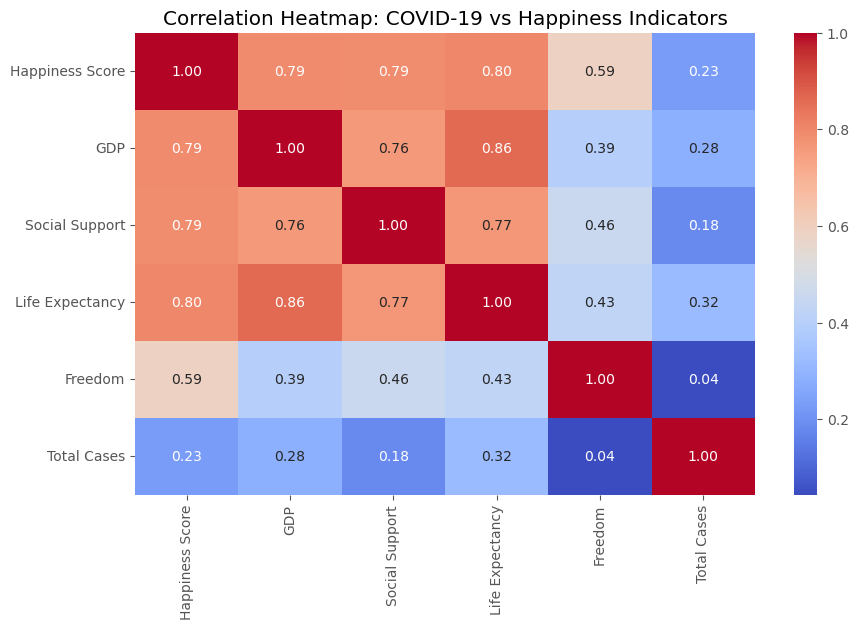

In [37]:
# Create correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: COVID-19 vs Happiness Indicators")
plt.show()

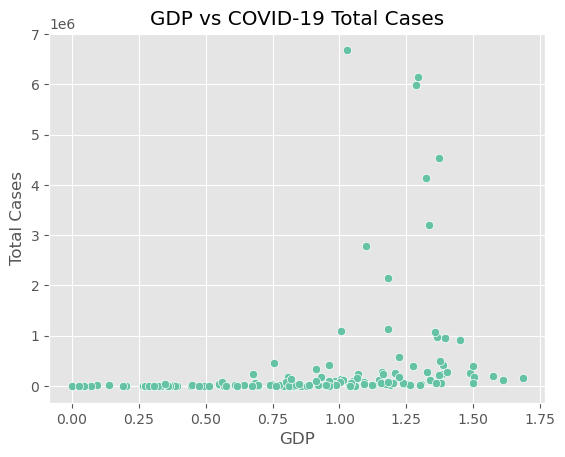

In [38]:
# GDP vs Total Cases
sns.scatterplot(data=merged_df, x='GDP', y='Total Cases')
plt.title("GDP vs COVID-19 Total Cases")
plt.show()

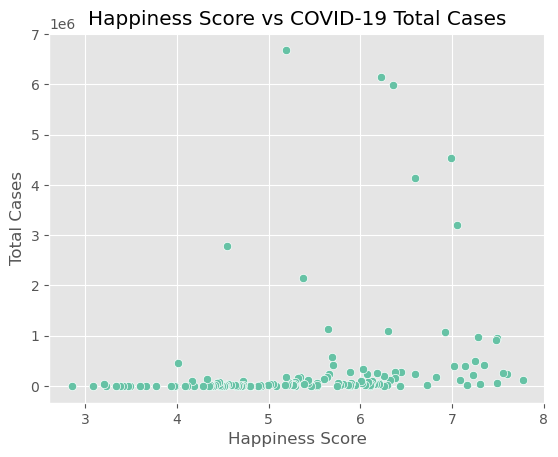

In [39]:
# Happiness vs Total Cases
sns.scatterplot(data=merged_df, x='Happiness Score', y='Total Cases')
plt.title("Happiness Score vs COVID-19 Total Cases")
plt.show()

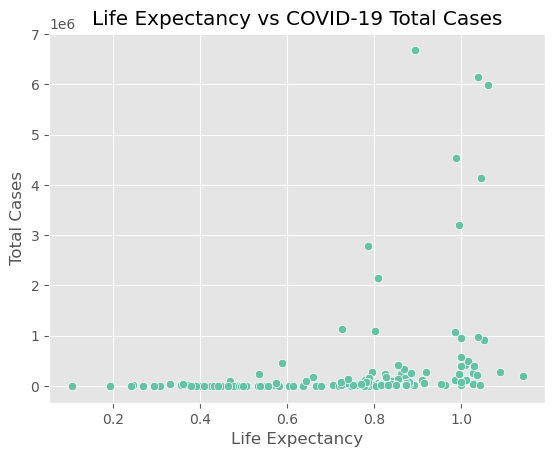

In [40]:
# Life Expectancy vs Total Cases
sns.scatterplot(data=merged_df, x='Life Expectancy', y='Total Cases')
plt.title("Life Expectancy vs COVID-19 Total Cases")
plt.show()